# Forecasting Video Game Global sales Prediction

## Problem  Statement

**Predicting Global sales of video game based on the model score.**

# Importing Libraries

In [2]:
# Package imports

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
# Ignoring the warnings

import warnings
warnings.filterwarnings("ignore")

## Load Data 

In [4]:
# Load the  data set

data_Train = pd.read_csv("Train.csv")
data_Train.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


In [5]:
#shape of the dataset

data_Train.shape

(14576, 15)

In [6]:
#Checking the data types of features

data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14574 non-null  object 
 1   Platform         14576 non-null  object 
 2   Year_of_Release  14344 non-null  float64
 3   Genre            14574 non-null  object 
 4   Publisher        14527 non-null  object 
 5   NA_Sales         14576 non-null  float64
 6   EU_Sales         14576 non-null  float64
 7   JP_Sales         14576 non-null  float64
 8   Critic_Score     7217 non-null   float64
 9   Critic_Count     7217 non-null   float64
 10  User_Score       8760 non-null   object 
 11  User_Count       6796 non-null   float64
 12  Developer        8829 non-null   object 
 13  Rating           8704 non-null   object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.7+ MB


In [7]:
# percentage of missing values in each column

missing_value_df = pd.DataFrame({'percent_missing': data_Train.isnull().sum() * 100 / len(data_Train)})
missing_value_df

,percent_missing
Name,0.013721
Platform,0.000000
Year_of_Release,1.591658
Genre,0.013721
Publisher,0.336169
NA_Sales,0.000000
EU_Sales,0.000000
JP_Sales,0.000000
Critic_Score,50.487102
Critic_Count,50.487102


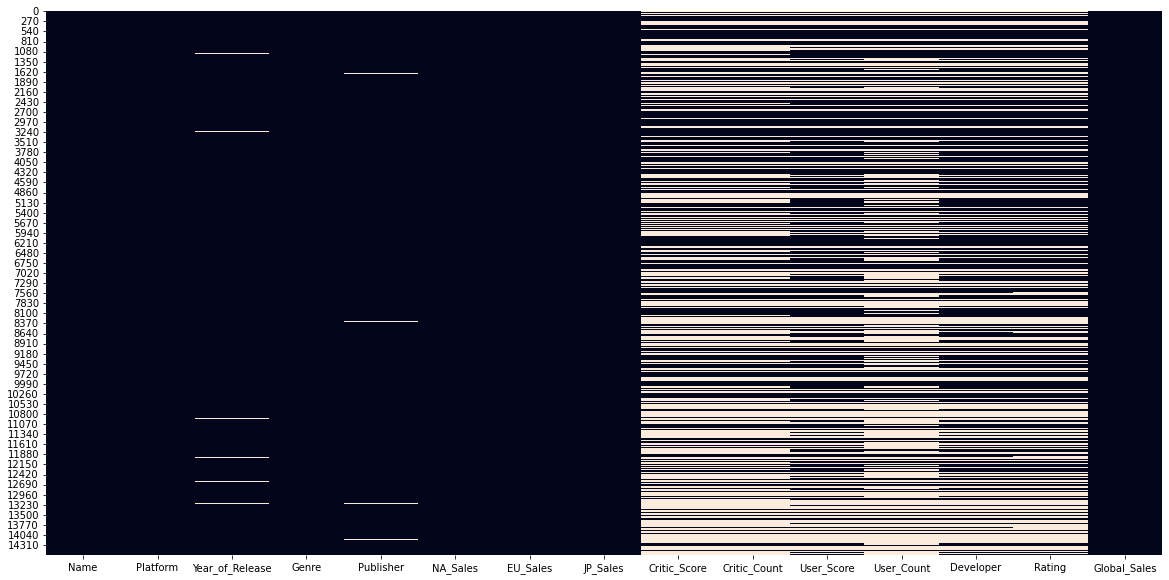

In [8]:
# plot heatmap to check null values

plt.figure(figsize=(20, 10))
sns.heatmap(data_Train.isnull(), cbar=False)
plt.show()

In [9]:
#Checking correlation  matrix

data_Train.corr()


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales
Year_of_Release,1.000000,-0.095694,0.006251,-0.176831,0.011131,0.236285,0.183643,-0.078659
NA_Sales,-0.095694,1.000000,0.763139,0.446972,0.243265,0.291196,0.249261,0.940451
EU_Sales,0.006251,0.763139,1.000000,0.432235,0.221334,0.273103,0.286614,0.900325
JP_Sales,-0.176831,0.446972,0.432235,1.000000,0.153130,0.176971,0.074393,0.610518
Critic_Score,0.011131,0.243265,0.221334,0.153130,1.000000,0.427287,0.268991,0.247418
Critic_Count,0.236285,0.291196,0.273103,0.176971,0.427287,1.000000,0.372011,0.299253
User_Count,0.183643,0.249261,0.286614,0.074393,0.268991,0.372011,1.000000,0.268000
Global_Sales,-0.078659,0.940451,0.900325,0.610518,0.247418,0.299253,0.268000,1.000000


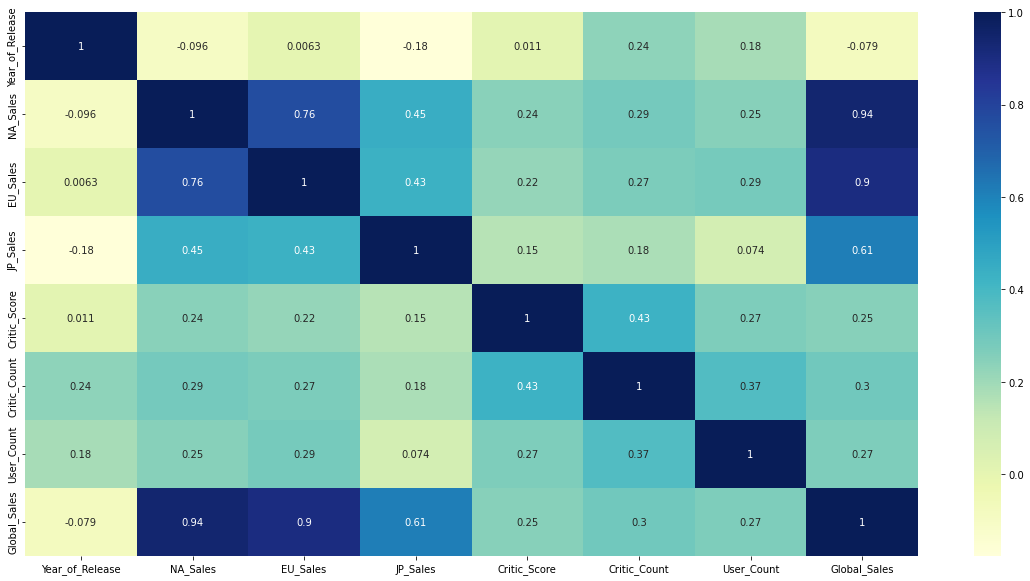

In [10]:
#plot heat map to check correlation

plt.figure(figsize=(20,10))
sns.heatmap(data_Train.corr(),annot=True,cmap="YlGnBu",cbar=True)
plt.show()

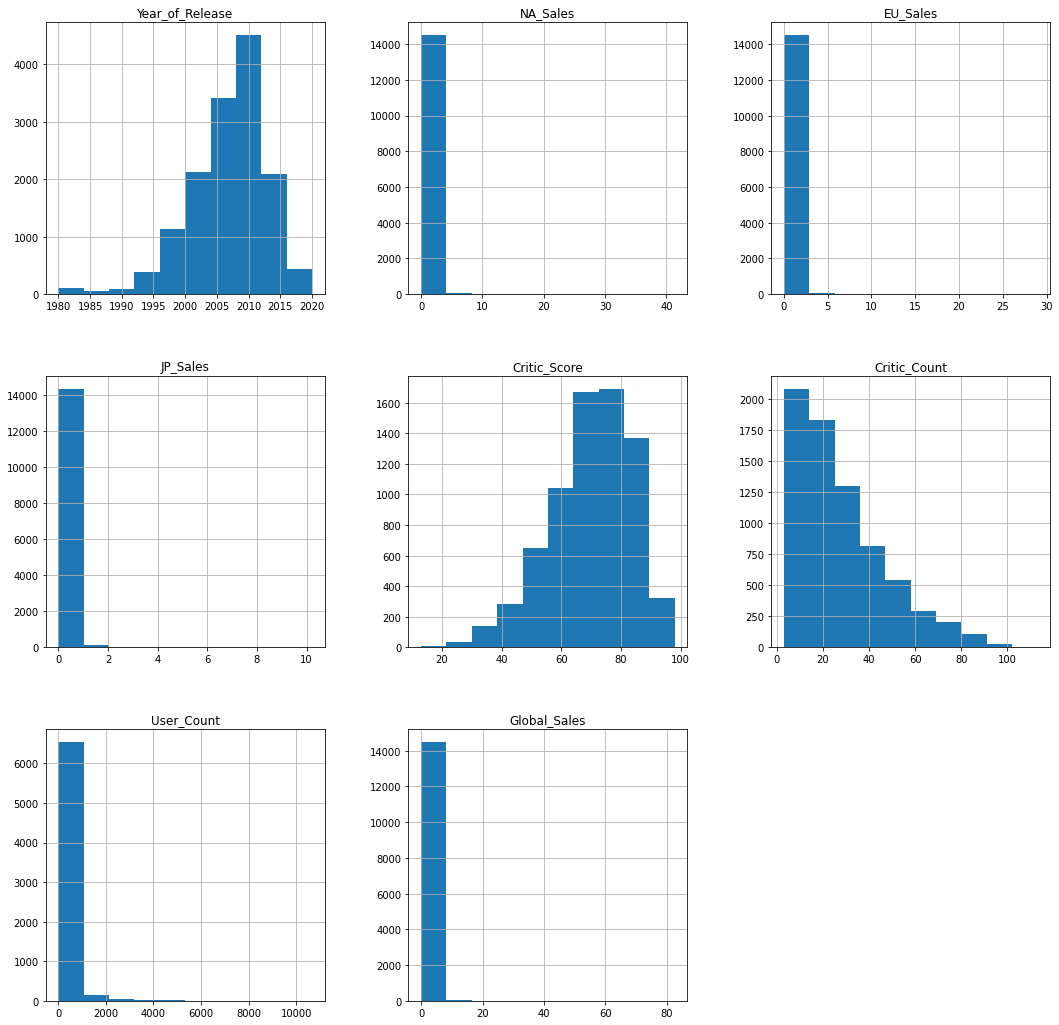

In [11]:
#plotting Histogram

fig = data_Train.hist(figsize = (18,18))

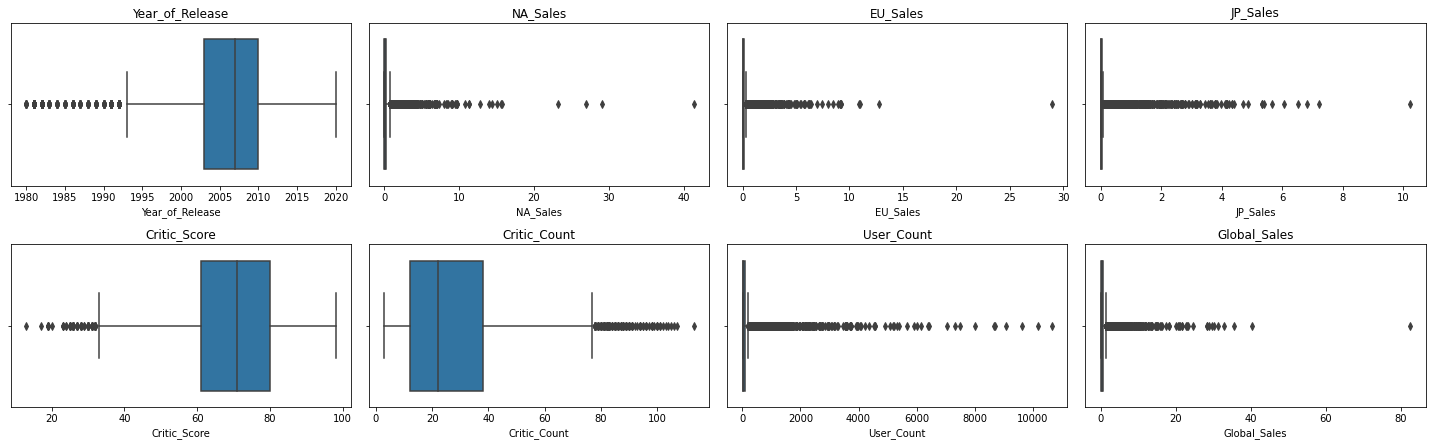

In [12]:
# Plotting boxplot for cheching outliers

object_ = data_Train.select_dtypes(include=["object"]).columns

count = 1
plt.figure(figsize=(20,12))
for i in data_Train.columns:
    if i not in object_:
        plt.subplot(4,4,count)
        sns.boxplot(data_Train[i]),plt.title(str(i))
        count = count+1
plt.tight_layout()

In [18]:
# Divinding the numerical and categorical columns 

num_col = data_Train.select_dtypes(include = "number").columns
cat_col = data_Train.select_dtypes(include = "object").columns

In [20]:
# num_col = ["Critic_Score","Critic_Count","User_Score","User_Count"]
# cat_col = ["Rating","Genre"]
data_Train['User_Score'] = data_Train['User_Score'].replace('tbd',np.nan).astype(float)

## Missing values imputation

In [ ]:
#Foer numerical columns missng values

from sklearn.impute import KNNImputer
impute_knn = KNNImputer()
impute=impute_knn.fit_transform(data_Train[num_col])

In [14]:
#For categorical columns filling with mode

data_Train[cat_col] = data_Train[cat_col].fillna(data_Train.mode().iloc[0])

In [15]:
#Creating the dataframe

data_Train = data_Train.drop(data_Train[num_col],axis=1)
imputed_data = pd.DataFrame(impute,columns=["Critic_Score","Critic_Count","User_Score","User_Count"])

In [16]:
#Concating the two datframe

data_Train = pd.concat([data_Train,imputed_data],axis=1)

In [17]:
#Copy of the dataset

data_Train1 = data_Train.copy(deep=True)

In [18]:
#Removing unnecessary Columns

data_Train1 = data_Train1.drop(["Name","Publisher","Developer","Year_of_Release"],axis=1)
data_Train1.head()

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Rating,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii,Sports,41.36,28.96,3.77,E,82.53,76.000000,51.000000,8.000000,322.000000
1,NES,Platform,29.08,3.58,6.81,E,40.24,69.676043,27.312041,7.152634,172.513096
2,Wii,Racing,15.68,12.76,3.79,E,35.52,82.000000,73.000000,8.300000,709.000000
3,Wii,Sports,15.61,10.93,3.28,E,32.77,80.000000,73.000000,8.000000,192.000000
4,GB,Role-Playing,11.27,8.89,10.22,E,31.37,69.676043,27.312041,7.152634,172.513096


## Encoding for Categorical columns

In [19]:
# Encoding techniques For Categorical features 
#OneHot Encoding for nomial data

data_Train1 = pd.get_dummies(data_Train1,drop_first=True)
data_Train1

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_3DO,Platform_3DS,...,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,41.36,28.96,3.77,82.53,76.000000,51.000000,8.000000,322.000000,0,0,...,0,1,0,1,0,0,0,0,0,0
1,29.08,3.58,6.81,40.24,69.676043,27.312041,7.152634,172.513096,0,0,...,0,0,0,1,0,0,0,0,0,0
2,15.68,12.76,3.79,35.52,82.000000,73.000000,8.300000,709.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
3,15.61,10.93,3.28,32.77,80.000000,73.000000,8.000000,192.000000,0,0,...,0,1,0,1,0,0,0,0,0,0
4,11.27,8.89,10.22,31.37,69.676043,27.312041,7.152634,172.513096,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,0.00,0.00,0.01,0.01,69.676043,27.312041,7.152634,172.513096,0,0,...,0,0,0,1,0,0,0,0,0,0
14572,0.00,0.01,0.00,0.01,69.676043,27.312041,7.152634,172.513096,0,0,...,0,1,0,1,0,0,0,0,0,0
14573,0.00,0.00,0.01,0.01,69.676043,27.312041,7.152634,172.513096,0,0,...,0,0,0,1,0,0,0,0,0,0
14574,0.01,0.00,0.00,0.01,69.676043,27.312041,7.152634,172.513096,0,0,...,0,0,0,1,0,0,0,0,0,0


In [20]:
#Removing the columns 
data_Train1 = data_Train1.drop(['Platform_3DO','Platform_GG','Platform_PCFX','Platform_TG16', 'Platform_WS','Rating_E','Rating_K-A','Rating_RP'],axis=1)
data_Train1

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_3DS,Platform_DC,...,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E10+,Rating_EC,Rating_M,Rating_T
0,41.36,28.96,3.77,82.53,76.000000,51.000000,8.000000,322.000000,0,0,...,0,0,0,0,1,0,0,0,0,0
1,29.08,3.58,6.81,40.24,69.676043,27.312041,7.152634,172.513096,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.68,12.76,3.79,35.52,82.000000,73.000000,8.300000,709.000000,0,0,...,1,0,0,0,0,0,0,0,0,0
3,15.61,10.93,3.28,32.77,80.000000,73.000000,8.000000,192.000000,0,0,...,0,0,0,0,1,0,0,0,0,0
4,11.27,8.89,10.22,31.37,69.676043,27.312041,7.152634,172.513096,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,0.00,0.00,0.01,0.01,69.676043,27.312041,7.152634,172.513096,0,0,...,0,0,0,0,0,0,0,0,0,0
14572,0.00,0.01,0.00,0.01,69.676043,27.312041,7.152634,172.513096,0,0,...,0,0,0,0,1,0,0,0,0,0
14573,0.00,0.00,0.01,0.01,69.676043,27.312041,7.152634,172.513096,0,0,...,0,0,0,0,0,0,0,0,0,0
14574,0.01,0.00,0.00,0.01,69.676043,27.312041,7.152634,172.513096,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split Target and features

In [21]:
#Spilt the data as a  Featuers

X = data_Train1.drop("Global_Sales",axis=1)

#Spilt the data as a target

y = data_Train1[["Global_Sales"]]

## Train test split

In [22]:
# Splitting dataset into X_train,X_test,y_train,y_test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print("Shape of X_train :",X_train.shape)
print("Shape of X_test ",X_test.shape)
print("Shape of y_train ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train : (11660, 47)
Shape of X_test  (2916, 47)
Shape of y_train  (11660, 1)
Shape of y_test (2916, 1)


## Model Building

### LinearRegression

In [23]:
from sklearn.linear_model import LinearRegression #Closed form solution
# build the model
OLS_model = LinearRegression()

# fit the model
OLS_model.fit(X_train, y_train)

LinearRegression()

In [24]:
#Predict the model for X_test

OLS_predict = OLS_model.predict(X_test)

In [25]:
# compute the R-Squared
r_squared_OLS = OLS_model.score(X_train,y_train)

# Number of observation or sample size
n = X_train.shape[0] 

# No of independent variables
p = X_train.shape[1]

#Compute Adj-R-Squared
Adj_r_squared_OLS = 1 - (1-r_squared_OLS)*(n-1)/(n-p-1)

# Compute RMSE
from sklearn.metrics import mean_squared_error

rmse_OLS = np.sqrt(mean_squared_error(y_test, OLS_predict))

In [26]:
print("R_Squared : ",r_squared_OLS)
print("Adjusted R2 :",Adj_r_squared_OLS)
print("Root_Mean_Square_Error(RMSE) :",rmse_OLS)

R_Squared :  0.9958331360878871
Adjusted R2 : 0.9958162705519011
Root_Mean_Square_Error(RMSE) : 0.20557978916118982


# Inference

## Read the data

In [27]:
# Import Dataset for Predict usig Test Data 

data_Test = pd.read_csv("Test.csv")
data_Test.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E


## Cheching null values

In [28]:
#Check the null values is their or not

data_Test.isnull().sum()

Name                  0
Platform              0
Year_of_Release      37
Genre                 0
Publisher             5
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       1223
Critic_Count       1223
User_Score          888
User_Count         1349
Developer           876
Rating              897
dtype: int64

In [29]:
#Store the name of the game

data_predict = data_Test["Name"]

In [30]:
#For storing the columns names for treating the null values

num_col = ["Critic_Score","Critic_Count","User_Score","User_Count"]
cat_col = ["Rating","Genre"]

data_Test['User_Score'] = data_Test['User_Score'].replace('tbd',np.nan).astype(float)

## Missing values imputation

In [31]:
#Impute the missing values with KNNImputer

from sklearn.impute import KNNImputer
impute_knn = KNNImputer()
impute1=impute_knn.fit_transform(data_Test[num_col])

In [32]:
# Create the dataframe

data_Test = data_Test.drop(data_Test[num_col],axis=1)
data_Test[cat_col] = data_Test[cat_col].fillna(data_Test[cat_col].mode().iloc[0])

In [33]:
# Concat the two datframe

imputed_data1 = pd.DataFrame(impute1,columns=["Critic_Score","Critic_Count","User_Score","User_Count"])

data_Test = pd.concat([data_Test,imputed_data1],axis=1)

In [34]:
#checking the null values after imputation

data_Test.isnull().sum()

Name                 0
Platform             0
Year_of_Release     37
Genre                0
Publisher            5
NA_Sales             0
EU_Sales             0
JP_Sales             0
Developer          876
Rating               0
Critic_Score         0
Critic_Count         0
User_Score           0
User_Count           0
dtype: int64

In [35]:
#copy of the original data
data_Test1 = data_Test.copy(deep=True)

In [36]:
#removing the some columns 

data_Test1= data_Test1.drop(["Name","Publisher","Developer","Year_of_Release"],axis=1)
data_Test1.head()

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Rating,Critic_Score,Critic_Count,User_Score,User_Count
0,X360,Sports,0.12,0.00,0.0,E,76.00000,13.400000,7.600000,7.000000
1,PS2,Fighting,0.07,0.05,0.0,E,63.41087,18.898913,6.888917,74.214106
2,DS,Puzzle,0.12,0.00,0.0,E,63.41087,18.898913,6.888917,74.214106
3,Wii,Racing,0.11,0.01,0.0,E10+,49.00000,22.000000,7.100000,7.000000
4,Wii,Puzzle,0.12,0.00,0.0,E,63.41087,18.898913,6.888917,74.214106


## Encoding for categorical features

In [37]:
#For categorical data one-hot-encoding technique

data_Test1 = pd.get_dummies(data_Test1,drop_first=True)
data_Test1

,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_3DS,Platform_DC,Platform_DS,...,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E10+,Rating_EC,Rating_M,Rating_T
0,0.12,0.00,0.0,76.00000,13.400000,7.600000,7.000000,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.07,0.05,0.0,63.41087,18.898913,6.888917,74.214106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.12,0.00,0.0,63.41087,18.898913,6.888917,74.214106,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.11,0.01,0.0,49.00000,22.000000,7.100000,7.000000,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.12,0.00,0.0,63.41087,18.898913,6.888917,74.214106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,0.05,0.00,0.0,61.00000,6.000000,8.000000,8.000000,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2139,0.00,0.05,0.0,71.00000,41.000000,6.900000,203.000000,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2140,0.06,0.00,0.0,63.41087,18.898913,6.888917,74.214106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2141,0.00,0.05,0.0,58.00000,5.000000,7.500000,4.000000,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
#Display the dataframe

data_Test1

,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_3DS,Platform_DC,Platform_DS,...,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E10+,Rating_EC,Rating_M,Rating_T
0,0.12,0.00,0.0,76.00000,13.400000,7.600000,7.000000,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.07,0.05,0.0,63.41087,18.898913,6.888917,74.214106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.12,0.00,0.0,63.41087,18.898913,6.888917,74.214106,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.11,0.01,0.0,49.00000,22.000000,7.100000,7.000000,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.12,0.00,0.0,63.41087,18.898913,6.888917,74.214106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,0.05,0.00,0.0,61.00000,6.000000,8.000000,8.000000,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2139,0.00,0.05,0.0,71.00000,41.000000,6.900000,203.000000,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2140,0.06,0.00,0.0,63.41087,18.898913,6.888917,74.214106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2141,0.00,0.05,0.0,58.00000,5.000000,7.500000,4.000000,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
#predict the test data using model

Test_predict = OLS_model.predict(data_Test1)
Test_predict

array([[0.1212489 ],
       [0.17290793],
       [0.12257702],
       ...,
       [0.05792068],
       [0.05253502],
       [0.04506357]])

In [40]:
Test_predict = Test_predict.flatten()
Test_predict = pd.Series(Test_predict)

In [41]:
#Create the dataframe for prediction

dataframe  = pd.DataFrame()
dataframe = pd.concat([data_predict.reset_index(drop=True),Test_predict.reset_index(drop=True)],axis=1)
dataframe.rename(columns={0:"Global_Sales"},inplace=True)

In [42]:
#disply the dataframe

dataframe

,Name,Global_Sales
0,Nicktoons: MLB,0.121249
1,Shonen Jump's One Piece: Grand Battle,0.172908
2,Learn Math,0.122577
3,Nitrobike,0.134175
4,Cruise Ship Vacation Games,0.119034
...,...,...
2138,Theresia...,0.040932
2139,Sacred 2: Fallen Angel,0.046862
2140,Dance Sensation!,0.057921
2141,Adventure Time: The Secret of the Nameless Kin...,0.052535


In [82]:
#Converting dataframe into csv file

dataframe.to_csv("Test_Prediction.csv",index=False)